In [35]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
import scipy as sp
import numpy as np

connection = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [36]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20221020.feed_actions 
WHERE toDate(time) between '2022-10-03' and '2022-10-09'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df = ph.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
1,10079,10079,10079,10079
2,9952,9952,9952,9952


In [37]:
df

,exp_group,user_id,likes,views,ctr
0,1,109963,3,15,0.200000
1,1,26117,32,141,0.226950
2,1,138232,18,73,0.246575
3,1,26295,33,122,0.270492
4,1,18392,7,32,0.218750
...,...,...,...,...,...
20026,1,132567,45,296,0.152027
20027,1,30872,11,59,0.186441
20028,2,25383,42,127,0.330709
20029,2,139020,24,114,0.210526


In [38]:
ctr_1=df[df.exp_group==1].likes.sum()/df[df.exp_group==1].views.sum()

In [39]:
ctr_1

0.20802680490126244

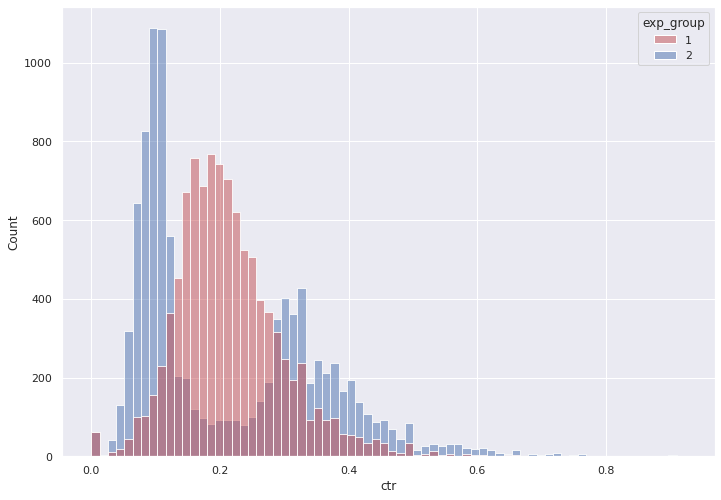

In [40]:
def get_linear(likes,ctr_control,views):
    return likes-ctr_control*views


df['linear']=df.apply(lambda x: get_linear(x['likes'],ctr_1,x['views']),axis=1)

sns.set(rc={'figure.figsize':(11.7,8.27)})
groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

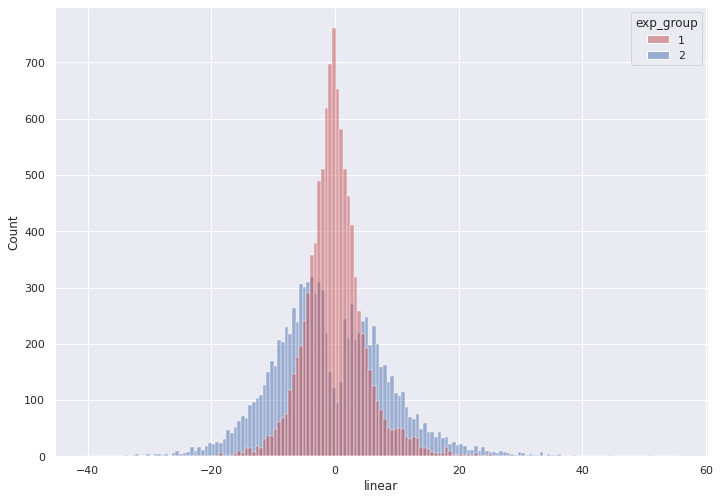

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='linear', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [42]:
ttest_pval_linear=sp.stats.ttest_ind(df[df.exp_group == 1].linear,
                df[df.exp_group == 2].linear,
                equal_var=False)

if ttest_pval_linear[1]>0.05:
    print('t-test pvalue: ',ttest_pval_linear[1],', Гипотеза о присутствии отличий не принята')
else:
    print('t-test pvalue: ',ttest_pval_linear[1],', Гипотеза о присутствии отличий принята')

t-test pvalue:  9.439432187037712e-10 , Гипотеза о присутствии отличий принята


In [43]:
ttest_pval_ctr=sp.stats.ttest_ind(df[df.exp_group == 1].ctr,
                df[df.exp_group == 2].ctr,
                equal_var=False)

if ttest_pval_ctr[1]>0.05:
    print('t-test pvalue: ',ttest_pval_ctr[1],', Гипотеза о присутствии отличий не принята')
else:
    print('t-test pvalue: ',ttest_pval_ctr[1],', Гипотеза о присутствии отличий принята')

t-test pvalue:  0.4780623130874935 , Гипотеза о присутствии отличий не принята


In [44]:
ttest_pval_ctr[1]>ttest_pval_linear[1]

True

In [45]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20221020.feed_actions 
WHERE toDate(time) between '2022-10-03' and '2022-10-09'
    and exp_group in (0,3)
GROUP BY exp_group, user_id
"""

df = ph.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
0,9999,9999,9999,9999
3,10049,10049,10049,10049


In [46]:
df

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300000
1,3,123580,13,48,0.270833
2,0,4944,8,41,0.195122
3,0,4504,5,15,0.333333
4,0,121508,18,88,0.204545
...,...,...,...,...,...
20043,3,13781,10,27,0.370370
20044,3,130651,18,98,0.183673
20045,0,3681,7,55,0.127273
20046,3,122008,5,41,0.121951


In [47]:
ctr_0=df[df.exp_group==0].likes.sum()/df[df.exp_group==0].views.sum()

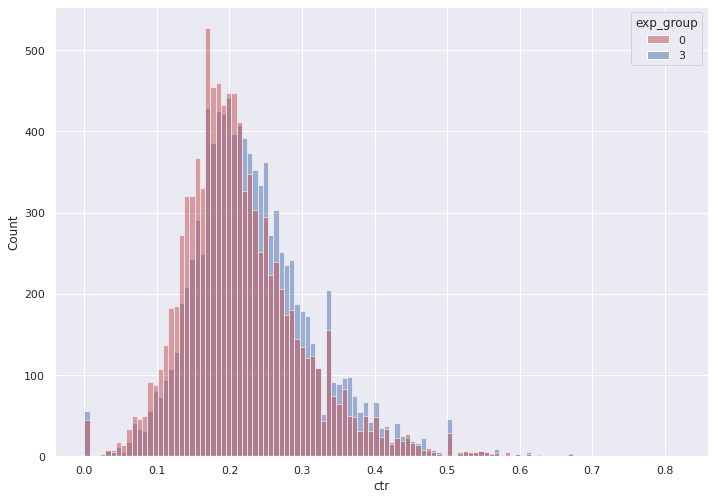

In [48]:
df['linear']=df.apply(lambda x: get_linear(x['likes'],ctr_0,x['views']),axis=1)

sns.set(rc={'figure.figsize':(11.7,8.27)})
groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

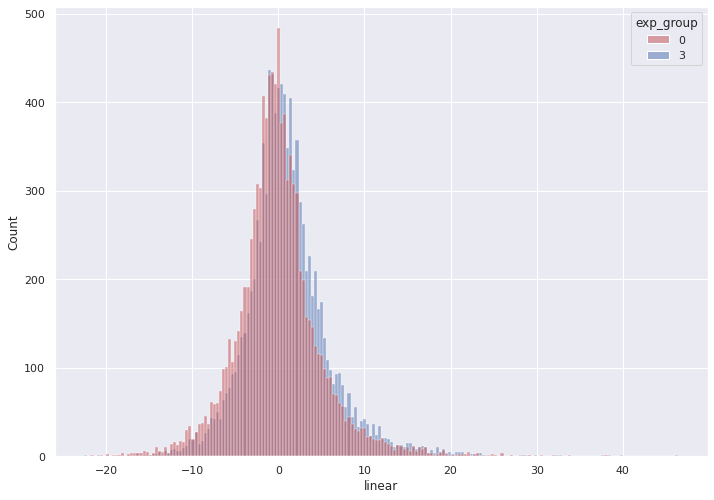

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='linear', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [50]:
ttest_pval_linear=sp.stats.ttest_ind(df[df.exp_group == 0].linear,
                df[df.exp_group == 3].linear,
                equal_var=False)

if ttest_pval_linear[1]>0.05:
    print('t-test pvalue: ',ttest_pval_linear[1],', Гипотеза о присутствии отличий не принята')
else:
    print('t-test pvalue: ',ttest_pval_linear[1],', Гипотеза о присутствии отличий принята')

t-test pvalue:  5.4914249479687664e-52 , Гипотеза о присутствии отличий принята


In [51]:
ttest_pval_ctr=sp.stats.ttest_ind(df[df.exp_group == 0].ctr,
                df[df.exp_group == 3].ctr,
                equal_var=False)

if ttest_pval_ctr[1]>0.05:
    print('t-test pvalue: ',ttest_pval_ctr[1],', Гипотеза о присутствии отличий не принята')
else:
    print('t-test pvalue: ',ttest_pval_ctr[1],', Гипотеза о присутствии отличий принята')

t-test pvalue:  1.055849414662529e-43 , Гипотеза о присутствии отличий принята


In [52]:
ttest_pval_ctr[1]>ttest_pval_linear[1]


True